# 넷플릭스 주가 데이터 분석

## 1. 기본 기능 (필수)

### 1) 데이터 수집 (F201)

- Kaggle에서 주가 데이터를 다운로드한다.

### 2) 데이터 전처리 (F202)

In [ ]:
- Numpy, Pandas 라이브러리를 활용하여 csv 파일을 불러온다.

In [7]:
!pip install numpy

  Using cached numpy-2.4.1-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
Using cached numpy-2.4.1-cp311-cp311-win_amd64.whl (12.6 MB)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
!pip install pandas

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 1.4 MB/s eta 0:00:08
   -- ------------------------------------- 0.6/9.9 MB 7.5 MB/s eta 0:00:02
   ---------------------- ----------------- 5.7/9.9 MB 45.1 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 63.2 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 63.2 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 63.2 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 35.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
!pip install matplotlib

     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     -------------- ----------------------- 20.5/52.8 kB 640.0 kB/s eta 0:00:01
     ---------------------- --------------- 30.7/52.8 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 52.8/52.8 kB 340.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/116.4 kB ? eta -:--:--
     ---------- ---------------------------- 30.7/116.4 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 116.4/116.4 kB 1.7 MB/s eta 0:00:00
  Using cached pillow-12.1.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------- -------------------- 4.1/8.1 MB 130.5 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 104.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 73.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/225.2 kB ? eta -:--:--
   ------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Numpy 라이브러리를 np라는 이름으로 호출
import numpy as np

In [10]:
def file_open_by_numpy():
    # np.loadtxt(구분자 = ',', 데이터 타입: string)
    np_arr = np.loadtxt('NFLX.CSV', delimiter=",", encoding='cp949', dtype=str)
    return np_arr

In [9]:
arr = file_open_by_numpy()
print(arr)

[['Date' 'Open' 'High' ... 'Close' 'Adj Close' 'Volume']
 ['2018-02-05' '262.000000' '267.899994' ... '254.259995' '254.259995'
  '11896100']
 ['2018-02-06' '247.699997' '266.700012' ... '265.720001' '265.720001'
  '12595800']
 ...
 ['2022-02-02' '448.250000' '451.980011' ... '429.480011' '429.480011'
  '14346000']
 ['2022-02-03' '421.440002' '429.260010' ... '405.600006' '405.600006'
  '9905200']
 ['2022-02-04' '407.309998' '412.769989' ... '410.170013' '410.170013'
  '7782400']]


In [ ]:
# Pandas DataFrame 생성

In [15]:
import pandas as pd

In [17]:
columns=arr[0]
arr = np.delete(arr, 0, 0)
df = pd.DataFrame(arr, columns=columns)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


- csv 구조를 확인하고 필요한 칼럼만 선별한다.
    - 사용 필드: Date, Open, High, Low, Close

In [27]:
# 처음 5개 열 보기 : 슬라이싱
df.iloc[:, :5]

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


### 3) 2021년 이후의 데이터 필터링 (F203)

- 2021년 이후의 데이터만 필터링한다.

In [20]:
# 'Date' 컬럼을 날짜형(datetime)으로 변환
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
# 2021년 이후 데이터 필터링
filtered_df = df.query("Date >= '2021-01-01'")
filtered_df.iloc[:, :5]

,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


- 필터링 완료된 DataFrame의 종가 데이터를 그래프로 시각화한다.

In [29]:
import matplotlib.pyplot as plt

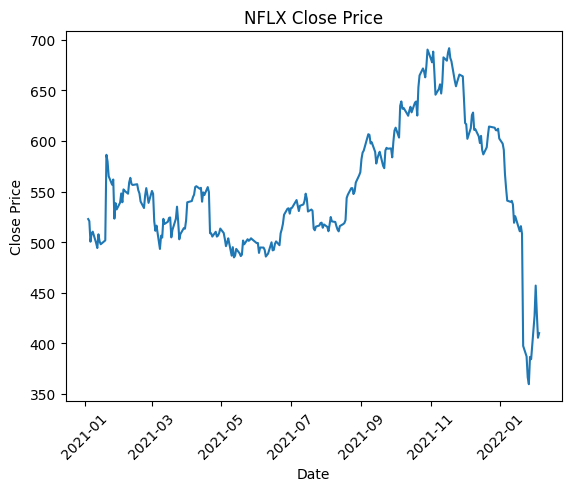

In [35]:
# 데이터 생성
x = filtered_df.iloc[:, 0]
y = filtered_df.iloc[:, 4]
# y축 데이터 수치형으로 변환
y = y.astype(float)

# 그래프 그리기
plt.plot(x, y)

# 그래프에 제목과 축 레이블 추가
plt.title('NFLX Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
# 날짜가 겹치지 않게 45도 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

In [ ]:
# 203 다른 풀이

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NFLX.csv')
df['Date'] = pd.to_datetime(df['Date'])

modified = df[['Date', 'Open', 'High', 'Low', 'Close']]
df_after_2021 = modified[modified['Date'] >= "2021-01-01"].copy()


monthly_avg = df_after_2021['Close']

monthly_avg.plot()

plt.title('NFLX Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

### 4) 최고/최저 종가 추출 (F204)

- 2021년 이후 데이터에서 종가(Close)의 최대/최소 값을 추출한다.

In [ ]:
#  204

import pandas as pd

df = pd.read_csv('NFLX.csv')
df['Date'] = pd.to_datetime(df['Date'])

modified = df[['Date', 'Open', 'High', 'Low', 'Close']]
df_after_2021 = modified[modified['Date'] >= "2021-01-01"]

df_after_2021.set_index('Date', inplace=True)


print(f"최고가: {max(df_after_2021['Close'])}")
print(f"최저가: {min(df_after_2021['Close'])}")

최고 종가: 691.690002
최저 종가: 359.700012


### 5) 월별 평균 종가 계산 (F205)

- 2021년 이후 데이터를 월별로 그룹화하여 평균 종가를 계산한다.

In [42]:
# 5열의 데이터 수치형으로 변환
filtered_df[filtered_df.columns[4]] = filtered_df[filtered_df.columns[4]].astype(float)

# 'Date'에서 월만 추출 후 월별 평균 계산
filtered_df['Month'] = filtered_df['Date'].dt.to_period('M')
monthly_avg = filtered_df.groupby('Month')[filtered_df.columns[4]].mean()

print(monthly_avg)

Month
2021-01    526.816845
2021-02    548.959999
2021-03    518.123482
2021-04    533.136662
2021-05    496.714497
2021-06    503.324091
2021-07    528.653330
2021-08    532.346817
2021-09    590.795239
2021-10    642.202849
2021-11    667.524286
2021-12    608.484089
2022-01    487.853500
2022-02    425.595009
Freq: M, Name: Close, dtype: float64


- 계산 결과를 DataFrame으로 저장하여 그래프로 시각화한다.

In [46]:
# 데이터 프레임 생성과 동시에 인덱스를 다시 열로 내림
monthly_df = monthly_avg.reset_index()
# 컬럼명 설정
monthly_df.columns = ['Date', 'Average Close Price']
# Date 열 데이터 타입 Period에서 문자열로 변환
monthly_df['Date'] = monthly_df['Date'].astype(str)

monthly_df

,Date,Average Close Price
0,2021-01,526.816845
1,2021-02,548.959999
2,2021-03,518.123482
3,2021-04,533.136662
4,2021-05,496.714497
5,2021-06,503.324091
6,2021-07,528.653330
7,2021-08,532.346817
8,2021-09,590.795239
9,2021-10,642.202849


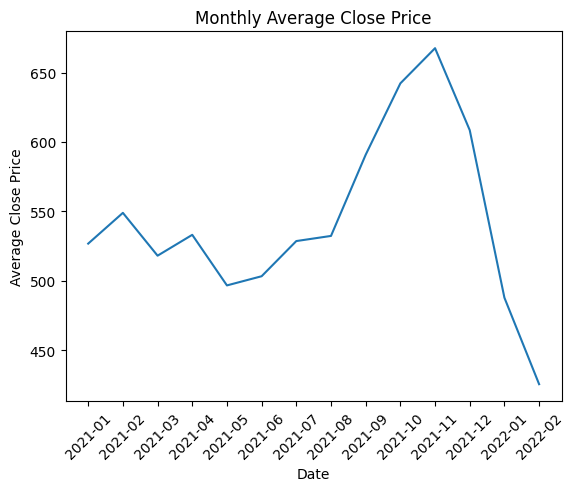

In [47]:
# 데이터 생성
x = monthly_df.iloc[:, 0]
y = monthly_df.iloc[:, 1]

# 그래프 그리기
plt.plot(x, y)

# 그래프에 제목과 축 레이블 추가
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')

# 날짜가 겹치지 않게 45도 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

In [ ]:
#  205 다른 풀이

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NFLX.csv')
df['Date'] = pd.to_datetime(df['Date'])

modified = df[['Date', 'Open', 'High', 'Low', 'Close']]
df_after_2021 = modified[modified['Date'] >= "2021-01-01"].copy()

df_after_2021.set_index('Date', inplace=True)

monthly_avg = df_after_2021['Close'].resample('ME').mean()

monthly_avg.plot()

plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.show()

### 6) 2022년 이후 최고/최저/종가 시각화 (F206)

- 2022년 이후의 데이터를 필터링하여, 일별 최고가, 최저가, 종가를 함께 표현하는 복합 라인 그래프를 작성한다.

In [50]:
# 2022년 이후 데이터 필터링
filtered_2022_df = df.query("Date >= '2022-01-01'")
filtered_2022_df.iloc[:, :5]

,Date,Open,High,Low,Close
985,2022-01-03,605.609985,609.989990,590.559998,597.369995
986,2022-01-04,599.909973,600.409973,581.599976,591.150024
987,2022-01-05,592.000000,592.840027,566.880005,567.520020
988,2022-01-06,554.340027,563.359985,542.010010,553.289978
989,2022-01-07,549.460022,553.429993,538.219971,541.059998
990,2022-01-10,538.489990,543.690002,526.320007,539.849976
991,2022-01-11,536.989990,543.909973,530.070007,540.840027
992,2022-01-12,544.270020,544.270020,532.020020,537.219971
993,2022-01-13,537.059998,540.789978,518.260010,519.200012
994,2022-01-14,517.599976,538.369995,511.880005,525.690002


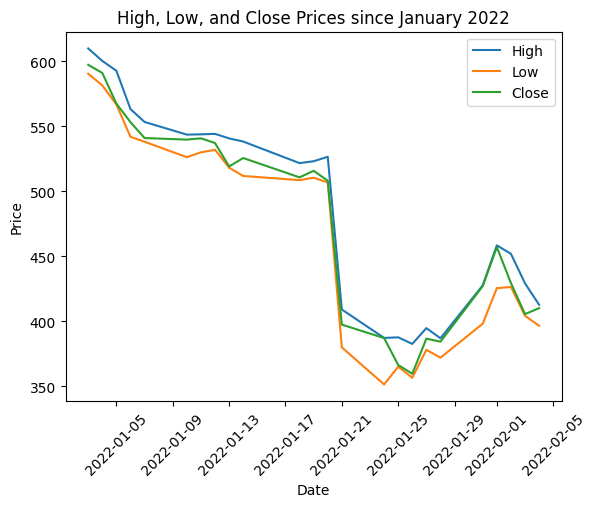

In [51]:
# 데이터 생성
x = filtered_2022_df.iloc[:, 0]
y = filtered_2022_df.iloc[:, 2]
y2 = filtered_2022_df.iloc[:, 3]
y3 = filtered_2022_df.iloc[:, 4]

# y축 데이터 수치형으로 변환
y = y.astype(float)
y2 = y2.astype(float)
y3 = y3.astype(float)

# 그래프 그리기
plt.plot(x, y, label='High')
plt.plot(x, y2, label='Low')
plt.plot(x, y3, label='Close')

# 범례 추가
plt.legend()

# 그래프에 제목과 축 레이블 추가
plt.title('High, Low, and Close Prices since January 2022')
plt.xlabel('Date')
plt.ylabel('Price')
# 날짜가 겹치지 않게 45도 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

In [ ]:
#  206 다른풀이

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NFLX.csv')
df['Date'] = pd.to_datetime(df['Date'])

modified = df[['Date', 'Open', 'High', 'Low', 'Close']]
df_after_2022 = modified[modified['Date'] >= "2022-01-01"].copy()

df_after_2022.set_index('Date', inplace=True)

monthly_avgc = df_after_2022['Close']
monthly_avgl = df_after_2022['Low']
monthly_avgh = df_after_2022['High']

monthly_avgh.plot(label = 'High')
monthly_avgl.plot()
monthly_avgc.plot()

plt.legend()
plt.title('Netflix Monthly Average Close Price (Since 2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
